In [1]:
import time
START = time.time()

# Problem Statement
Were are having data across Eurpoe's Hotels. We wil build a model using average score , reviews, positive counts of words, negative count of words ,  average score, etc


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Hypothesis

we assume hotels with more positive words, high text polarity have Good , high average score.

# Importing Libraries

In [3]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
from textblob import TextBlob
import statistics as st
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import accuracy_score,r2_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [4]:
# reading dataframe
df = pd.read_csv('/content/drive/MyDrive/HOTEL REVIEW DATASET/Hotel_Reviews.csv')


In [5]:
# df = df.sample(10000)

# reducing space by chagnging data type

In [6]:
df['Average_Score'] = df['Average_Score'].astype('float16')
df['Reviewer_Score'] = df['Reviewer_Score'].astype('float16')
df['Reviewer_Nationality'] = df['Reviewer_Nationality'].astype('category')
df['Review_Total_Negative_Word_Counts'] = df['Review_Total_Negative_Word_Counts'].astype('int16')
df['Total_Number_of_Reviews'] = df['Total_Number_of_Reviews'].astype('int16')
df['Total_Number_of_Reviews_Reviewer_Has_Given'] = df['Total_Number_of_Reviews_Reviewer_Has_Given'].astype('int16')
df['lat'] = df['lat'].astype('float16')
df['lng'] = df['lng'].astype('float16')

In [7]:
def description(i):
    print("INFORMATION ABOUT DATA")


    print("*"*100)
    print("dataframe's shape ")
    print(i.shape)
    print()

    print("*"*100)
    print("description of data frame ")
    print(i.describe())
    print()

    print("*"*100)
    print("dataframe information :  ")
    print(i.info())
    print()

    print("*"*100)
    print("columns in dataframe : ")
    print(i.columns)
    print()


    print("*"*100)
    print("missing values : ")
    print(i.isnull().sum())
    print()



description(df)

INFORMATION ABOUT DATA
****************************************************************************************************
dataframe's shape 
(515738, 17)

****************************************************************************************************
description of data frame 
       Additional_Number_of_Scoring  Average_Score  \
count                 515738.000000  515738.000000   
mean                     498.081836            NaN   
std                      500.538467       0.000000   
min                        1.000000       5.199219   
25%                      169.000000       8.101562   
50%                      341.000000       8.398438   
75%                      660.000000       8.796875   
max                     2682.000000       9.796875   

       Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
count                      515738.000000            515738.000000   
mean                           18.539450              2743.743944   
std                  

# EDA (Exploratory Data Analysis)

lets glance through the data and find out some insights

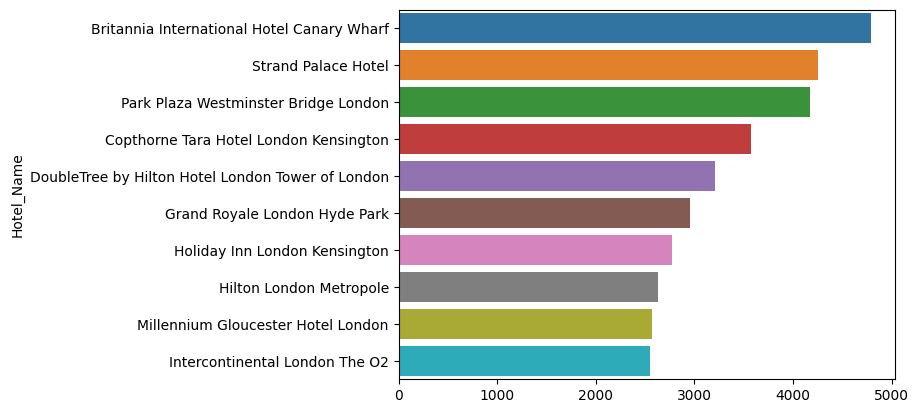

In [8]:
number_of_reviews = df.groupby("Hotel_Name")['Hotel_Address'].count().nlargest(10)
number_of_reviews
sns.barplot(y = number_of_reviews.index , x = number_of_reviews.values)
plt.show()

Britannia International hotel located in Canary Wharf has achieved highest number of review followed by Strand Palace Hotel

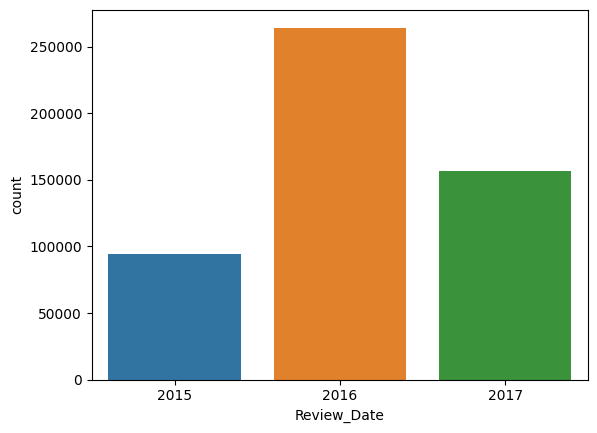

In [9]:
df['Review_Date'] = pd.to_datetime(df['Review_Date'])
review_year = df['Review_Date'].dt.year
sns.countplot(x = review_year)
plt.show()

Year 2016 has highest reviews

<Axes: >

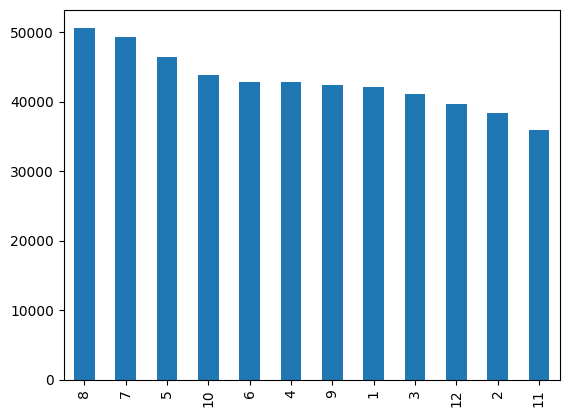

In [10]:
review_month = df['Review_Date'].dt.month
review_month = review_month.value_counts()
review_month.plot(kind = "bar")


August and July have highest number of reviews

In [11]:
df.head(3)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.699219,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.900391,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.375,4.914062
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.699219,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.500000,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.375,4.914062
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.699219,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.101562,"[' Leisure trip ', ' Family with young childre...",3 days,52.375,4.914062


In [12]:
# WORDCLOUD
# Removing Punctuations and other characters
def remove_punctuations(i):
    i=re.sub(r'[^a-zA-Z ]','',i)
    return i

def split(i):
    return i.split()


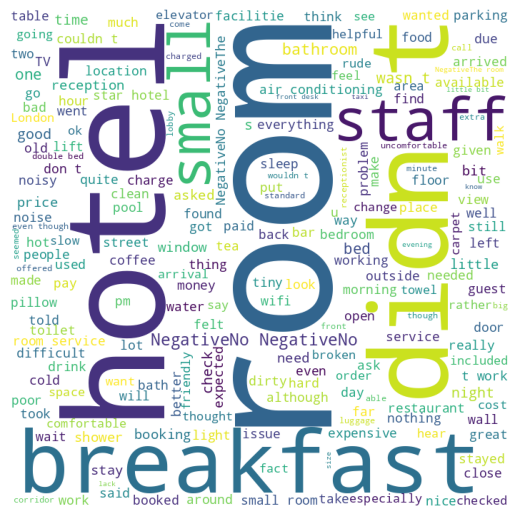

In [13]:
# WORDCLOUD for NEGATIVE REVIEW

df['Negative_Review'] = df['Negative_Review'].apply(remove_punctuations)

words = df['Negative_Review'].apply(split)

string_of_words=""
for i in words:
    string_of_words += " ".join(i)

wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                min_font_size = 10).generate(string_of_words)

plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


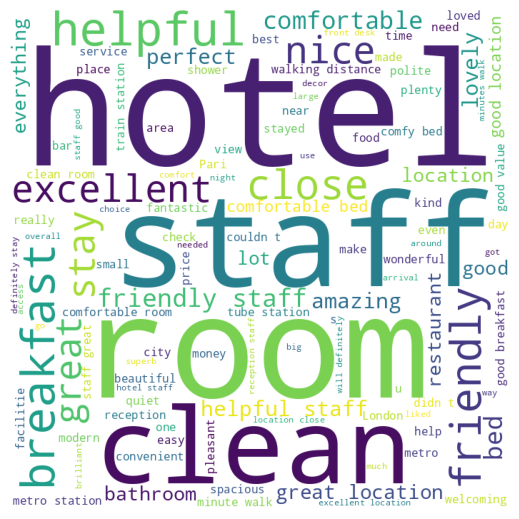

In [14]:
# WORDCLOUD for POSITIVE REVIEW

df['Positive_Review'] = df['Positive_Review'].apply(remove_punctuations)

words = df['Positive_Review'].apply(split)

string_of_words=""
for i in words:
    string_of_words += " ".join(i)

wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                min_font_size = 10).generate(string_of_words)

plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [15]:
mean_stats = df.groupby("Hotel_Name").mean()
mean_stats.head(3)

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
Hotel_Name,,,,,,,,,
11 Cadogan Gardens,101.0,8.703125,15.528302,393.0,19.974843,7.226415,8.845642,51.50000,-0.159180
1K Hotel,69.0,7.699219,24.932432,663.0,15.601351,9.141892,7.861460,48.87500,2.365234
25hours Hotel beim MuseumsQuartier,391.0,8.796875,16.161103,4324.0,21.911466,8.722787,8.983402,48.21875,16.359375


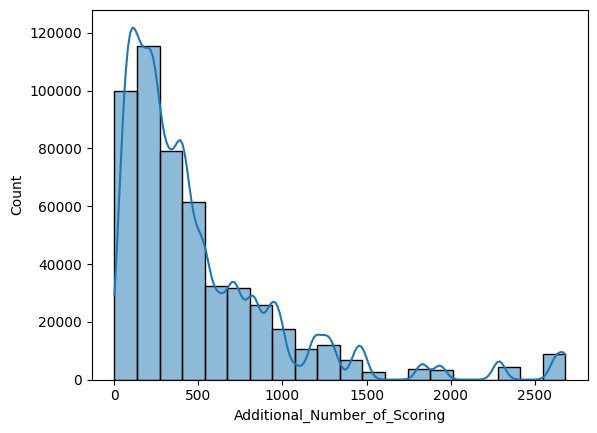

In [16]:
sns.histplot(x = df['Additional_Number_of_Scoring'],kde = 1,bins = 20)
plt.show()

Most number of hotels have 0-500 number of additional number of scoring

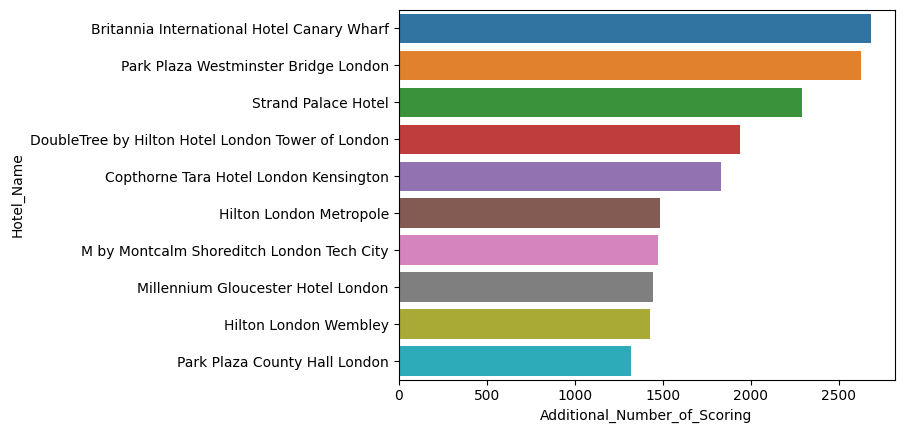

In [17]:
var = mean_stats.nlargest(10,"Additional_Number_of_Scoring")
sns.barplot(var , x = "Additional_Number_of_Scoring" , y = var.index)
plt.show()

Addition number scoring by mean (top 10 hotels )

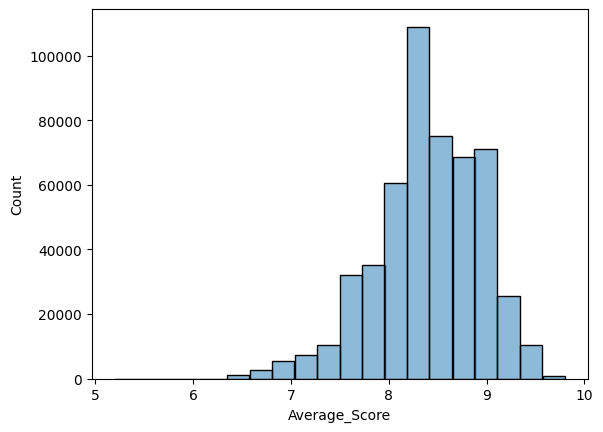

In [18]:
sns.histplot(x = df['Average_Score'],kde = 1,bins = 20)
plt.show()

High Frequency of hotels rating ranging from 8-9

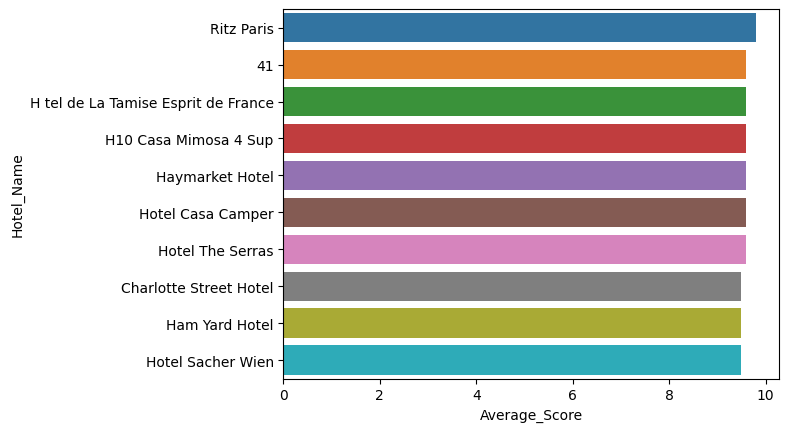

In [19]:
var = mean_stats.nlargest(10,"Average_Score")
sns.barplot(var , x = "Average_Score" , y = var.index)
plt.show()

Hotels with highest average score (Top 10)

<Axes: xlabel='Review_Total_Negative_Word_Counts', ylabel='Count'>

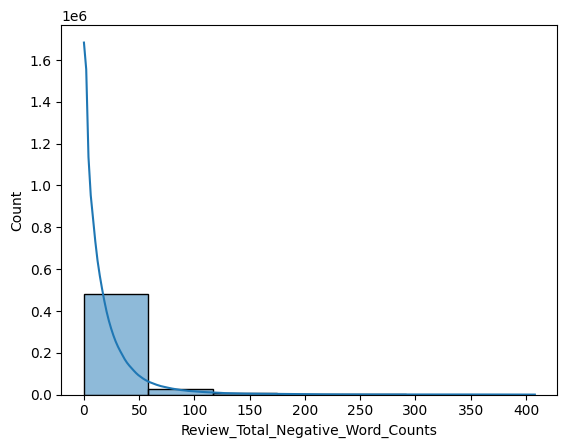

In [20]:
sns.histplot(x = df['Review_Total_Negative_Word_Counts'],kde = 1,bins = 7)

most hotels have around 50 negative words

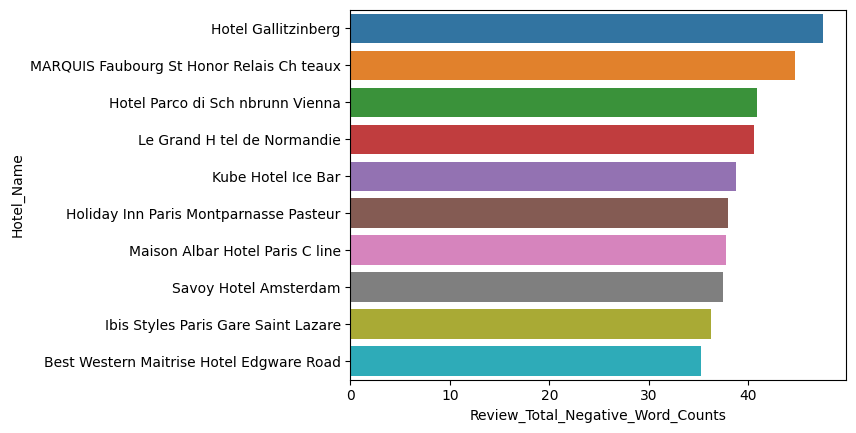

In [21]:
var = mean_stats.nlargest(10,"Review_Total_Negative_Word_Counts")
sns.barplot(var , x = "Review_Total_Negative_Word_Counts" , y = var.index)
plt.show()

Hotels with most average word counts (Negative)

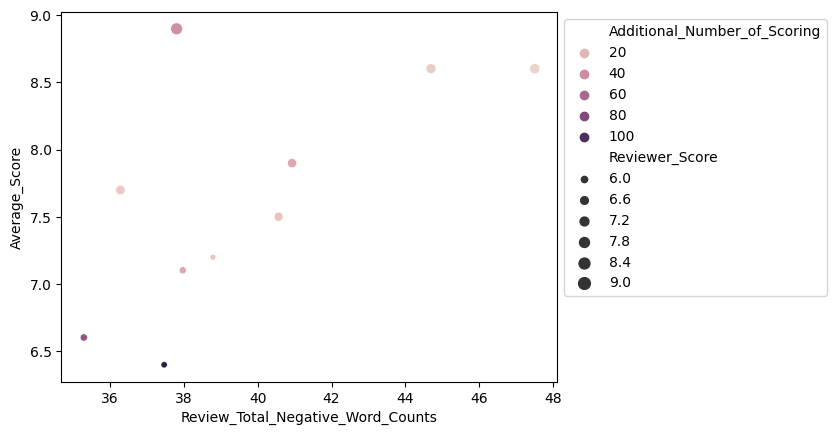

In [22]:
sns.scatterplot(var , x = "Review_Total_Negative_Word_Counts" , y = "Average_Score", size = "Reviewer_Score" , hue = "Additional_Number_of_Scoring")
plt.legend(bbox_to_anchor = (1,1))

In [23]:
mean_stats

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
Hotel_Name,,,,,,,,,
11 Cadogan Gardens,101.0,8.703125,15.528302,393.0,19.974843,7.226415,8.845642,51.50000,-0.159180
1K Hotel,69.0,7.699219,24.932432,663.0,15.601351,9.141892,7.861460,48.87500,2.365234
25hours Hotel beim MuseumsQuartier,391.0,8.796875,16.161103,4324.0,21.911466,8.722787,8.983402,48.21875,16.359375
41,66.0,9.601562,8.883495,244.0,25.300971,6.009709,9.712075,51.50000,-0.143677
45 Park Lane Dorchester Collection,27.0,9.398438,6.750000,68.0,11.535714,7.214286,9.603795,51.50000,-0.151489
...,...,...,...,...,...,...,...,...,...
citizenM London Bankside,804.0,9.101562,13.977587,3802.0,20.856295,9.768622,9.112486,51.50000,-0.100464
citizenM London Shoreditch,500.0,9.101562,14.439141,2113.0,21.620525,8.219570,9.092210,51.53125,-0.078674
citizenM Tower of London,832.0,9.101562,15.623292,4672.0,24.430778,9.334522,9.135900,51.50000,-0.076416


<Axes: xlabel='Review_Total_Positive_Word_Counts', ylabel='Count'>

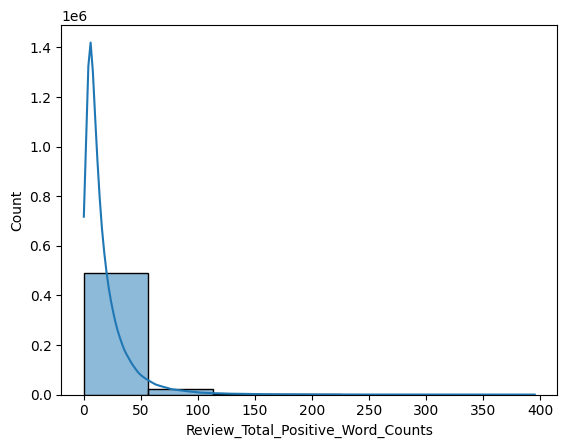

In [24]:
sns.histplot(x = df['Review_Total_Positive_Word_Counts'],kde = 1,bins = 7)

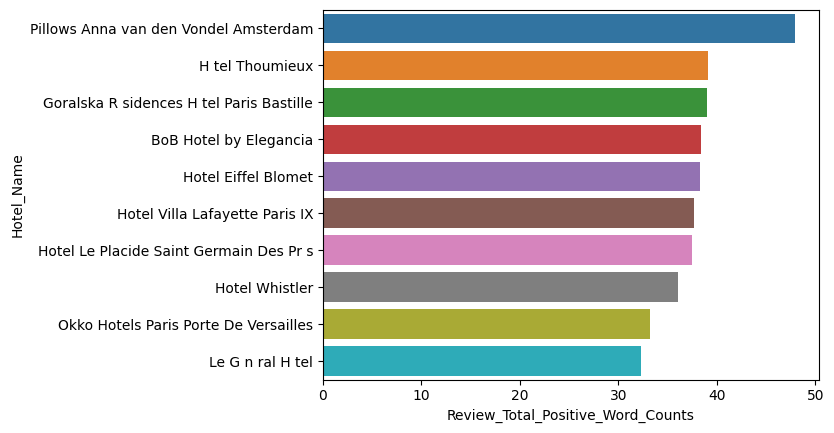

In [25]:
var = mean_stats.nlargest(10,"Review_Total_Positive_Word_Counts")
sns.barplot(var , x = "Review_Total_Positive_Word_Counts" , y = var.index)
plt.show()

Hotels with most average word counts (Positive)

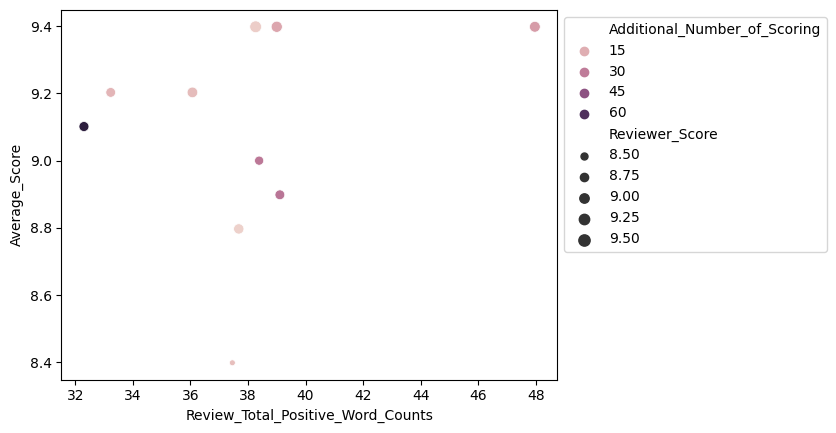

In [26]:
sns.scatterplot(var , x = "Review_Total_Positive_Word_Counts" , y = "Average_Score", size = "Reviewer_Score" , hue = "Additional_Number_of_Scoring")
plt.legend(bbox_to_anchor = (1,1))

<Axes: xlabel='Total_Number_of_Reviews_Reviewer_Has_Given', ylabel='Count'>

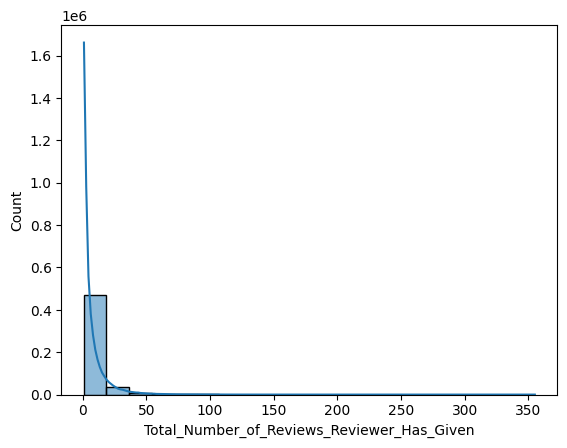

In [27]:
sns.histplot(x = df['Total_Number_of_Reviews_Reviewer_Has_Given'],kde = 1,bins = 20)

averagely reviews given by customers

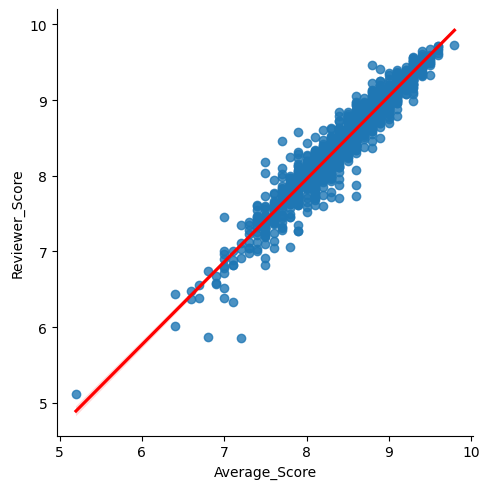

In [28]:
sns.lmplot(mean_stats , x = "Average_Score" , y = "Reviewer_Score" ,line_kws={'color': 'red'})
plt.show()

Positive Corelation is observed

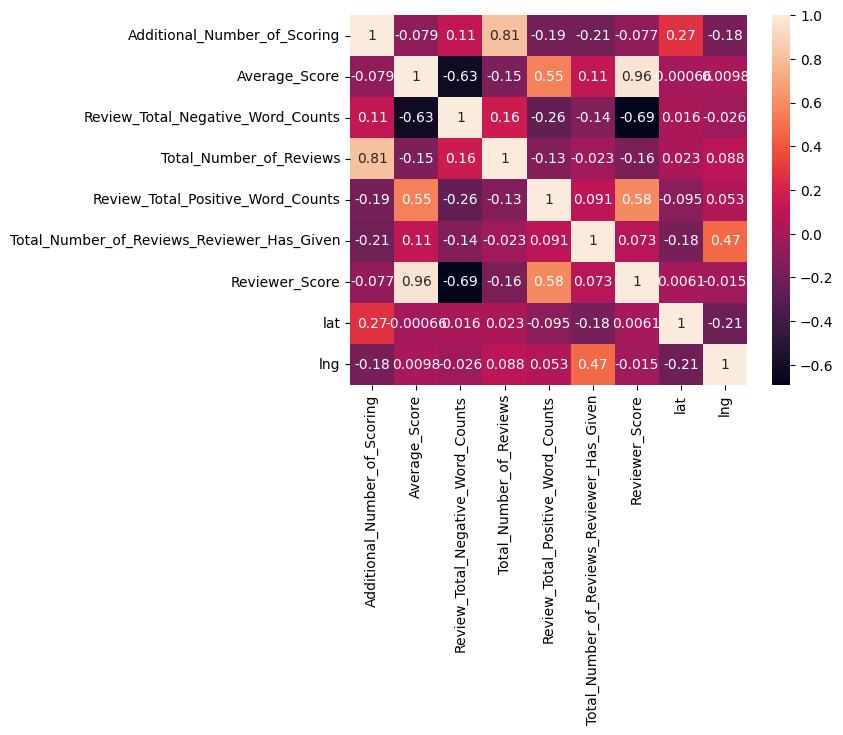

In [29]:
corr = mean_stats.corr()
sns.heatmap(corr,annot=True)
plt.show()

Positive corelated features

<Axes: >

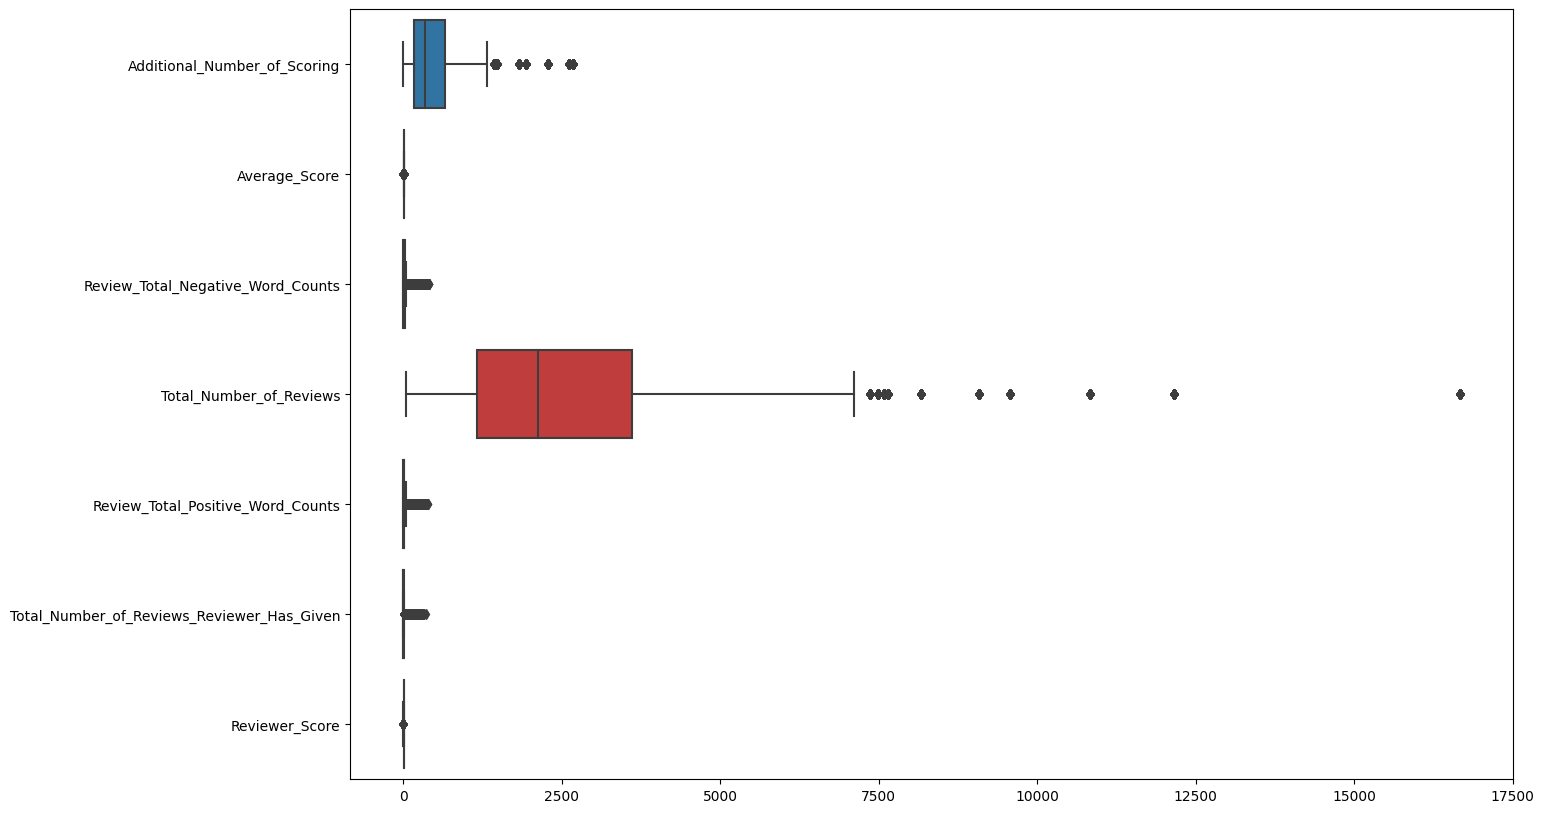

In [30]:
plt.figure(figsize=(15,10))
sns.boxplot(df.drop(["lat","lng"],axis=1),orient="h")

outliers detected (we will handle them later)

<Axes: xlabel='Hotel_Name'>

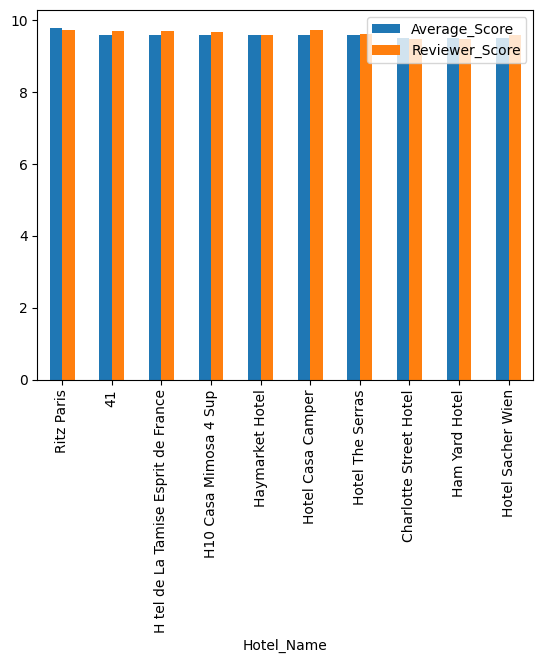

In [31]:
mean_stats[['Average_Score',"Reviewer_Score"]].nlargest(10,['Average_Score']).plot(kind = "bar")

Reviews of highesst rated vs average score

In [32]:
df.head(3)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.699219,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.900391,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.375,4.914062
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.699219,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.500000,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.375,4.914062
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.699219,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.101562,"[' Leisure trip ', ' Family with young childre...",3 days,52.375,4.914062


# Data Preprocessing & Feature engineering

In [33]:
# applying text blob and calculating polarity

def polarity(i):
    polarity = TextBlob(i)
    return polarity.sentiment.polarity

In [34]:
df["Negative_Polarity"] = df['Negative_Review'].apply(polarity)
df["Positive_Polarity"] = df["Positive_Review"].apply(polarity)
df.head(3)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Negative_Polarity,Positive_Polarity
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.699219,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.900391,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.375,4.914062,0.029406,0.283333
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.699219,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.500000,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.375,4.914062,0.150000,0.241960
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.699219,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.101562,"[' Leisure trip ', ' Family with young childre...",3 days,52.375,4.914062,0.032653,0.460000


In [35]:
# Handling missing values
df.isnull().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
Negative_Polarity                                0
Positive_Polarity                                0
dtype: int64

X missing values

In [36]:
df.dropna(inplace = True)
df.isnull().sum()

Hotel_Address                                 0
Additional_Number_of_Scoring                  0
Review_Date                                   0
Average_Score                                 0
Hotel_Name                                    0
Reviewer_Nationality                          0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Tags                                          0
days_since_review                             0
lat                                           0
lng                                           0
Negative_Polarity                             0
Positive_Polarity                             0
dtype: int64

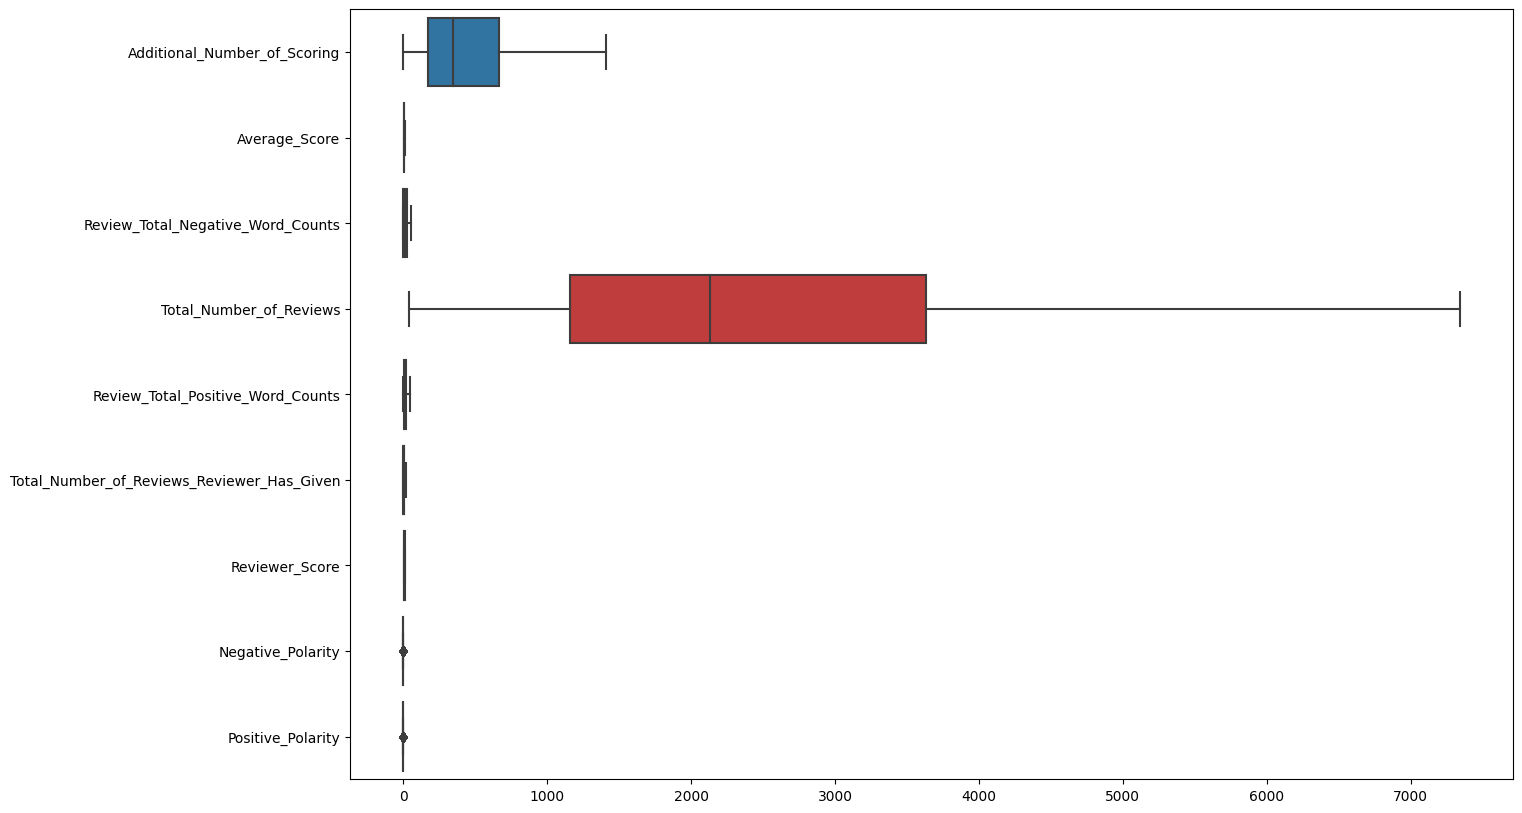

In [37]:
# Handling outliers by MIN MAX



for i in mean_stats.columns:
    q1,q3 = np.quantile(df[i],q = [0.25,0.75])
    IQR = q3 - q1
    lower_range = q1 - (1.5*IQR)
    upper_range = q3 + (1.5*IQR)
    df[i] = np.clip(df[i],lower_range,upper_range)


plt.figure(figsize=(15,10))
sns.boxplot(df.drop(["lat","lng"],axis=1),orient="h")
plt.show()

Preparing Data to feed for model

In [38]:
X = df[["Additional_Number_of_Scoring","Hotel_Name","Review_Total_Negative_Word_Counts","Total_Number_of_Reviews","Review_Total_Positive_Word_Counts","Total_Number_of_Reviews_Reviewer_Has_Given","Reviewer_Score","Negative_Polarity","Positive_Polarity"]]
y = df["Average_Score"]

In [39]:
df.head(3)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Negative_Polarity,Positive_Polarity
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194.0,2017-08-03,7.699219,Hotel Arena,Russia,I am so angry that i made this post available...,54.5,1403,Only the park outside of the hotel was beauti...,11.0,7.0,4.347656,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.375,4.914062,0.029406,0.283333
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194.0,2017-08-03,7.699219,Hotel Arena,Ireland,No Negative,0.0,1403,No real complaints the hotel was great great ...,47.5,7.0,7.500000,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.375,4.914062,0.150000,0.241960
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194.0,2017-07-31,7.699219,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42.0,1403,Location was good and staff were ok It is cut...,21.0,9.0,7.101562,"[' Leisure trip ', ' Family with young childre...",3 days,52.375,4.914062,0.032653,0.460000


In [40]:
# label encoding
encoder = LabelEncoder()
X["Hotel_Name"] = encoder.fit_transform(X["Hotel_Name"])
X["Hotel_Name"] = X["Hotel_Name"].astype("category")
X

,Additional_Number_of_Scoring,Hotel_Name,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Negative_Polarity,Positive_Polarity
0,194.0,560,54.5,1403,11.0,7.0,4.347656,0.029406,0.283333
1,194.0,560,0.0,1403,47.5,7.0,7.500000,0.150000,0.241960
2,194.0,560,42.0,1403,21.0,9.0,7.101562,0.032653,0.460000
3,194.0,560,54.5,1403,26.0,1.0,4.347656,-0.070370,0.625000
4,194.0,560,54.5,1403,8.0,3.0,6.699219,-0.009091,0.300000
...,...,...,...,...,...,...,...,...,...
515733,168.0,80,14.0,2823,2.0,8.0,7.000000,0.000000,0.000000
515734,168.0,80,11.0,2823,11.0,12.0,5.800781,-0.250000,0.250000
515735,168.0,80,19.0,2823,0.0,3.0,4.347656,0.100000,-0.113636
515736,168.0,80,0.0,2823,25.0,3.0,8.796875,0.150000,0.300000


In [41]:
# Scaling
scalar = MinMaxScaler()
X[['Additional_Number_of_Scoring',
       'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score',
       'Negative_Polarity', 'Positive_Polarity']] = scalar.fit_transform(X[['Additional_Number_of_Scoring',
       'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score',
       'Negative_Polarity', 'Positive_Polarity']])

In [42]:
X.head(3)

,Additional_Number_of_Scoring,Hotel_Name,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Negative_Polarity,Positive_Polarity
0,0.136831,560,1.000000,0.186352,0.231579,0.342857,0.000000,0.514703,0.641667
1,0.136831,560,0.000000,0.186352,1.000000,0.342857,0.557706,0.575000,0.620980
2,0.136831,560,0.770642,0.186352,0.442105,0.457143,0.487215,0.516327,0.730000


In [43]:
# Splitting data for training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=20)

Our data is ready to feed to models

# Modeling
We will build the following models in this section :


In [44]:
Model_name_list = []
Training_scores_list = []
Testing_scores_list = []

# Linear Regression

In [45]:
Model_name_list.append("Linear Regression") #inserting name of model for tabular form

LR =LinearRegression(n_jobs=5) #Calling model

model_LR = LR.fit(X_train,y_train)   # model fitting

training_score = model_LR.score(X_train,y_train)

testing_score = model_LR.score(X_test,y_test)

print(f"Training score = {training_score} \nTesting score  = {testing_score}")
Training_scores_list.append(training_score)
Testing_scores_list.append(testing_score)

Training score = 0.17581557992136454 
Testing score  = 0.18034955630617533


# Ridge Regression

In [46]:
Model_name_list.append("Ridge Regression") #inserting name of model for tabular form

ridge = Ridge() #Calling model

model_ridge = ridge.fit(X_train,y_train)   # model fitting

training_score = model_ridge.score(X_train,y_train)

testing_score = model_ridge.score(X_test,y_test)

print(f"Training score = {training_score} \nTesting score  = {testing_score}")
Training_scores_list.append(training_score)
Testing_scores_list.append(testing_score)

Training score = 0.17581557902260336 
Testing score  = 0.18034941265147997


# Lasso Regression

In [47]:
Model_name_list.append("Lasso Regression") #inserting name of model for tabular form

lasso = Lasso() #Calling model

model_lasso = lasso.fit(X_train,y_train)   # model fitting

training_score = model_lasso.score(X_train,y_train)

testing_score = model_lasso.score(X_test,y_test)

print(f"Training score = {training_score} \nTesting score  = {testing_score}")
Training_scores_list.append(training_score)
Testing_scores_list.append(testing_score)

Training score = 0.009564207685000325 
Testing score  = 0.010150342234982235


# KNN

In [48]:
Model_name_list.append("KNN") #inserting name of model for tabular form

knn = KNeighborsRegressor() #Calling model

parameters = {"n_neighbors":[200]}     # (515000)**0.5 is approx equal to 717

GS = GridSearchCV(knn,param_grid=parameters,n_jobs=5,cv=3)

model_knn =GS.fit(X_train,y_train)   # model fitting

print(f"Best parameters are : {model_knn.best_params_}")

training_score = model_knn.score(X_train,y_train)

testing_score = model_knn.score(X_test,y_test)

print(f"Training score = {training_score} \nTesting score  = {testing_score}")
Training_scores_list.append(training_score)
Testing_scores_list.append(testing_score)

Best parameters are : {'n_neighbors': 200}
Training score = 0.9315049601837172 
Testing score  = 0.9315798110747456


# Decision Tree

In [49]:
Model_name_list.append("Decision Tree") #inserting name of model for tabular form

DT = DecisionTreeRegressor(random_state= 42) #Calling model

parameters = {'splitter':['best','random'],'max_depth':[6,7,8,9],'min_samples_split':[2,3,4]}

GS = GridSearchCV(DT,param_grid=parameters,n_jobs=5,cv=3)

model_DT =GS.fit(X_train,y_train)   # model fitting

print(f"Best parameters are : {model_DT.best_params_}")

training_score = model_DT.score(X_train,y_train)

testing_score = model_DT.score(X_test,y_test)

print(f"Training score = {training_score} \nTesting score  = {testing_score}")
Training_scores_list.append(training_score)
Testing_scores_list.append(testing_score)

Best parameters are : {'max_depth': 9, 'min_samples_split': 2, 'splitter': 'best'}
Training score = 0.4829368356874494 
Testing score  = 0.484371840820362


# Random Forest

In [50]:
Model_name_list.append("Random Forest") #inserting name of model for tabular form

RF = RandomForestRegressor(random_state= 42) #Calling model

parameters = {'max_depth':[8,9],'n_estimators':[75,100],'min_samples_split':[3,4,5]}

GS = GridSearchCV(RF,param_grid=parameters,n_jobs=5,cv=3)

model_RF =GS.fit(X_train,y_train)   # model fitting

print(f"Best parameters are : {model_RF.best_params_}")

training_score = model_RF.score(X_train,y_train)

testing_score = model_RF.score(X_test,y_test)

print(f"Training score = {training_score} \nTesting score  = {testing_score}")
Training_scores_list.append(training_score)
Testing_scores_list.append(testing_score)

Best parameters are : {'max_depth': 9, 'min_samples_split': 3, 'n_estimators': 100}
Training score = 0.528297356078644 
Testing score  = 0.5282643390374682


<Axes: >

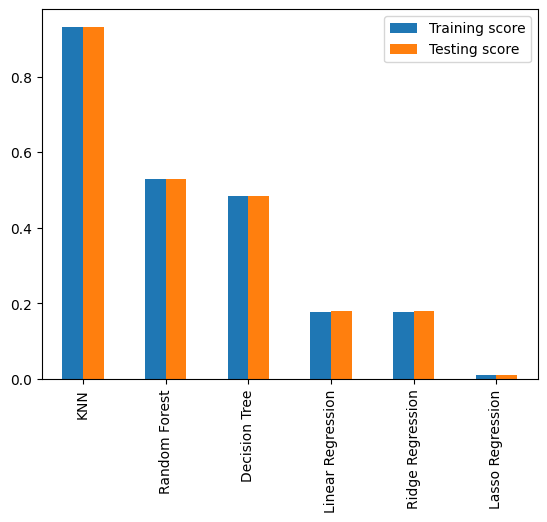

In [51]:
model_info = pd.DataFrame(data = Training_scores_list ,index = Model_name_list,columns =["Training score"])
model_info["Testing score"]= Testing_scores_list
model_info.sort_values(by = "Testing score",ascending = False).plot(kind = "bar")

# Final Model

As we observe we get max accuracy with KNN model so we will use it

and the model is not overfitted too


In [52]:

knn = KNeighborsRegressor(n_neighbors = 150) #Calling model

model_knn =knn.fit(X_train,y_train)   # model fitting

training_score = model_knn.score(X_train,y_train)

testing_score = model_knn.score(X_test,y_test)

print(f"Training score = {training_score} \nTesting score  = {testing_score}")


Training score = 0.9551172057223175 
Testing score  = 0.9543283414741828


# INSIGHTS :
Our model is not overfitted and has high accuracy of 95%

# Conclusion -

We will use KNN regressor model with 150 neighbors

In [53]:
STOP =time.time()
print(((STOP - START)/60))

55.21342218319575
